<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/filterpy_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install filterpy

In [ ]:
!pip install microprediction

# Hello world example
See https://www.microprediction.com/blog/popular-timeseries-packages for more time series packages

In [20]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:200]

In [23]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

def run(ys):
    burnin = 50
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.F = np.array([[1.]])
    kf.H = np.array([[1.]])

    # "Fit" the filter ... library does not seem to provide this functionality
    q_var = np.var(ys[:burnin])
    kf.Q = np.array([[q_var]])
    kf.R = np.array([[q_var]])

    x_rest = list()
    kf.x = np.array([0])
    kf.P *= 10.
    ys_test = ys[burnin:]
    for y in ys_test[:-1]:
        kf.predict()            # Predict does not return a value. Grumble grumble
        x_rest.append(kf.x[0])
        kf.update([y])

    return [0] + list(ys[:burnin]) + x_rest
XS = run(YS)
len(XS)


200

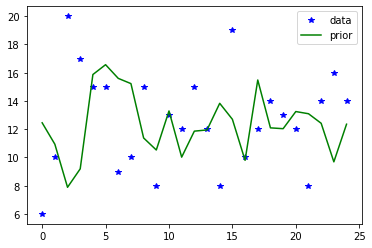

In [24]:
import matplotlib.pyplot as plt
plt.plot(YS[125:150],'*b')
plt.plot(XS[125:150],'g')
plt.legend(['data','prior'])